<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/12_Combining_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Combining DataFrames__

In [1]:
import numpy as np
import pandas as pd

__Concatination__

In [ ]:
data_one = {'A':['A0','A1','A2','A3'], 'B':['B0','B1','B2','B3']}

In [ ]:
data_two = {'C':['C0','C1','C2','C3'], 'D':['D0','D1','D2','D3']}

In [ ]:
one = pd.DataFrame(data_one)

In [ ]:
two = pd.DataFrame(data_two)

In [ ]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


**Concatinate along Columns**

In [ ]:
pd.concat([one, two],axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


**Concatinate along Rows**

In [ ]:
pd.concat([one,two],axis=0)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


In [ ]:
two.columns = one.columns

In [ ]:
two

,A,B
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [ ]:
pd.concat([one,two],axis=0)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [ ]:
mydef = pd.concat([one,two],axis=0)

In [ ]:
mydef.index

Int64Index([0, 1, 2, 3, 0, 1, 2, 3], dtype='int64')

In [ ]:
mydef.index = range(len(mydef))

In [ ]:
mydef

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


__Merge__

In [2]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [3]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [4]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [5]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

**Inner,Left, Right, and Outer Joins**

**Inner Join**

*Match up where the key is present in BOTH tables. There should be no NaNs due to the join, since by definition to be part of the Inner Join they need info in both tables.* <br>
**Only Andrew and Bobo both registered and logged in.**

In [6]:
pd.merge(registrations, logins, how='inner', on='name')

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


In [7]:
pd.merge(logins, registrations, how='inner', on='name')

,log_id,name,reg_id
0,2,Andrew,1
1,4,Bobo,2


In [8]:
# Pandas reports an error if "on" key column isn't in both dataframes
# pd.merge(registrations,logins,how='inner',on='reg_id')

**Left Join**

*Match up AND include all rows from Left Table.*
*Show everyone who registered on Left Table, if they don't have login info, then fill with NaN.*

In [9]:
pd.merge(left=registrations, right=logins, how='left', on='name')

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


**Right Join**<br>
*Match up AND include all rows from Right Table.*
*Show everyone who logged in on the Right Table, if they don't have registration info, then fill with NaN.*

In [10]:
pd.merge(left=registrations, right=logins, how='right', on='name')

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


In [12]:
pd.merge(left=registrations, right=logins, how='right')

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


In [13]:
pd.merge(registrations, logins, how='outer', on='name')

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


**Join on Index or Column**

*Use combinations of left_on,right_on,left_index,right_index to merge a column or index on each other*

In [14]:
registrations = registrations.set_index('name')

In [15]:
registrations

,reg_id
name,
Andrew,1
Bobo,2
Claire,3
David,4


In [16]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [17]:
pd.merge(registrations, logins, left_index=True, right_on='name')

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bobo


In [18]:
registrations = registrations.reset_index()

In [19]:
registrations

,name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


**Dealing with differing key column names in joined tables**

In [20]:
registrations.columns = ['reg_name','reg_id']

In [21]:
registrations

,reg_name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [23]:
result = pd.merge(registrations, logins, left_on='reg_name', right_on='name')

In [24]:
result

,reg_name,reg_id,log_id,name
0,Andrew,1,2,Andrew
1,Bobo,2,4,Bobo


In [25]:
result.drop('reg_name', axis=1)

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bobo


**Pandas automatically tags duplicate columns**

In [26]:
registrations.columns = ['name', 'id']

In [27]:
logins.columns = ['id', 'name']

In [28]:
registrations

,name,id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [29]:
logins

,id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [30]:
pd.merge(registrations, logins, how='inner', on='name')

,name,id_x,id_y
0,Andrew,1,2
1,Bobo,2,4


In [31]:
pd.merge(registrations, logins, how='inner', on='name',suffixes=('_reg','_log'))

,name,id_reg,id_log
0,Andrew,1,2
1,Bobo,2,4


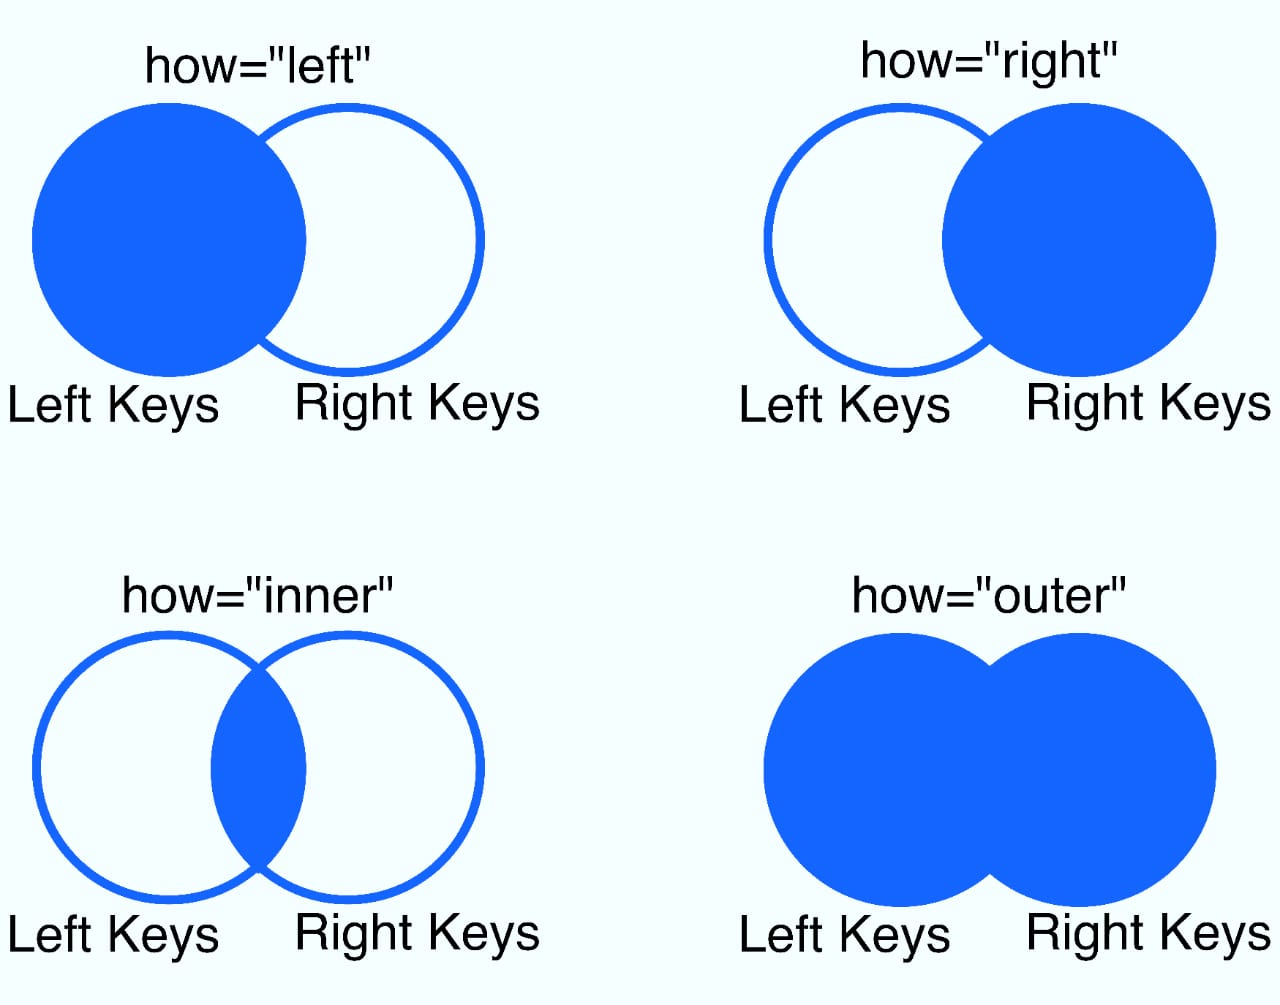